In [76]:
#opens up a webcam feed so you can then test your classifer in real time
#using detectMultiScale
import numpy
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 

In [82]:
def detect(cascade_classifier, gray_image, image):

    # y camera coordinate of the target point 'P'
    v = 0

    # minimum value to proceed traffic light state validation
    threshold = 150     

    # detection
    cascade_obj = cascade_classifier.detectMultiScale(
        gray_image,
        scaleFactor=1.1,
        minNeighbors=5,
        minSize=(30, 30),
        flags=cv2.CASCADE_SCALE_IMAGE
    )

    # draw a rectangle around the objects
    for (x_pos, y_pos, width, height) in cascade_obj:
        cv2.rectangle(image, (x_pos+5, y_pos+5), (x_pos+width-5, y_pos+height-5), (255, 255, 255), 2)
        v = y_pos + height - 5
        print(x_pos+5, y_pos+5, x_pos+width-5, y_pos+height-5, width, height)
         # stop sign
        if width/height == 1:
            cv2.putText(image, 'STOP', (x_pos, y_pos-10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
            print 'stop'
            
#         traffic lights
        else:
            roi = gray_image[y_pos+10:y_pos + height-10, x_pos+10:x_pos + width-10]
            mask = cv2.GaussianBlur(roi, (25, 25), 0)
            (minVal, maxVal, minLoc, maxLoc) = cv2.minMaxLoc(mask)

            # check if light is on
            if maxVal - minVal > threshold:
                cv2.circle(roi, maxLoc, 5, (255, 0, 0), 2)

                # Red light
                if 1.0/8*(height-30) < maxLoc[1] < 4.0/8*(height-30):
                    cv2.putText(image, 'Red', (x_pos+5, y_pos-5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)
                    print 'red'

                # Green light
                elif 5.5/8*(height-30) < maxLoc[1] < height-30:
                    cv2.putText(image, 'Green', (x_pos+5, y_pos - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

                    print 'green'
#                 yellow light
                elif 4.0/8*(height-30) < maxLoc[1] < 5.5/8*(height-30):
                   cv2.putText(image, 'Yellow', (x_pos+5, y_pos - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 255), 2)
                   self.yellow_light = True
        return v

        # def box(rects, img):
        #     for x1, y1, x2, y2 in rects:
        #         cv2.rectangle(img, (x1, y1), (x2, y2), (127, 255, 0), 2)
        #     #cv2.imwrite('one.jpg', img);



In [98]:
light_cascade = cv2.CascadeClassifier('../cascade_xml/traffic_light.xml')

stop_cascade = cv2.CascadeClassifier('../cascade_xml/stop_sign.xml')

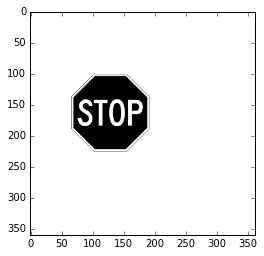

In [99]:


stop = cv2.imread('../../files_prepare/stopPrototype.png')

stop = cv2.cvtColor(stop, cv2.COLOR_BGR2RGB)
stop_gray = cv2.cvtColor(stop, cv2.COLOR_RGB2GRAY)
plt.gray()
plt.imshow(stop)
plt.imshow(stop_gray)
plt.show()


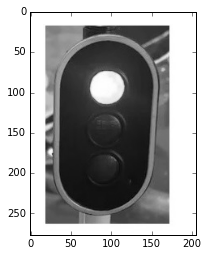

In [100]:
img = cv2.imread('3.JPG')


# gray = cv2.imdecode(np.fromstring(img, dtype=np.uint8), 0)
# image = cv2.imdecode(np.fromstring(img, dtype=np.uint8), -1)

# cv2.imshow('img',gray)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.gray()
plt.imshow(img)
plt.imshow(gray)
plt.show()

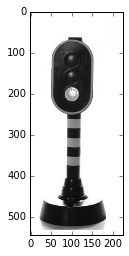

In [101]:
img2 = cv2.imread('2.JPG')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
gray2 = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)
plt.gray()
plt.imshow(img2)
plt.imshow(gray2)
plt.show()

(31, 18, 154, 247, 133, 239)
red
(50, 94, 148, 279, 108, 195)
green
(51, 92, 192, 233, 151, 151)
stop


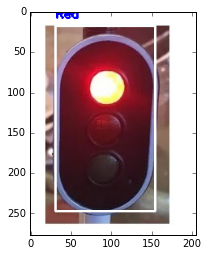

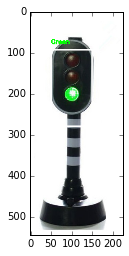

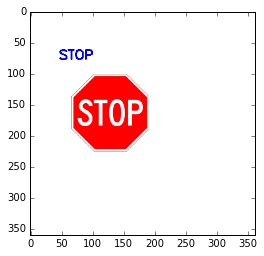

In [102]:
# object detection
v_param1 = detect(light_cascade, gray, img)
v_param2 = detect(light_cascade, gray2, img2)
v_param3 = detect(stop_cascade, stop_gray, stop)
# print cv2.__version

# cv2.imshow('img',img)
plt.imshow(img)
plt.show()

plt.imshow(img2)
plt.show()


plt.imshow(stop)
plt.show()